# KNN

- Tenemos los diferentes grupos de datos
- Un dato nuevo cual queremos clasificar
- Medimos la distancia entre el nuevo datos y los demas grupos y lo pondra al grupo mas cercano
- Definimos los representantes de cada grupo
- Funciona con conjuntos de datos no tan grandes

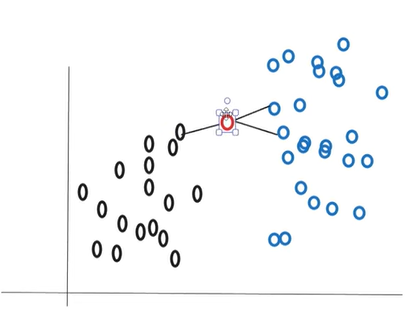

## Formas de Calcular la Distancia
- Enclidiana
- Manhattan
- Minkowski

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from colorama import Style, Fore, Back


### Preparacion de Datos

In [6]:
data = pd.read_csv("Data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
X = data.iloc[:, [2, 3]] # La edad y el salario estimado
y = data.iloc[:, -1].values # La columna Purchased

In [8]:
#
#* Nos encargamos de la variable categorica Gender
gender = data[["Gender"]]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(gender)

print(ic(cat_encoder.categories_))

ic| cat_encoder.categories_: [array(['Female', 'Male'], dtype=object)]


[array(['Female', 'Male'], dtype=object)]


In [9]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Explicacion: El resultado de la codificacion one hot es una matriz dispersa, por lo que tenemos que convertirla a un dataframe para poder visualizarla.
#* La matriz dispersa es una matriz que contiene muchos ceros, por lo que se almacena de forma eficiente en memoria.
encoded_df.head(3)

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0


In [10]:
data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos la matriz de edad y salario estimado con la matriz de codificacion one hot.
data_1.head(3)
ic(data_1.shape)

ic| data_1.shape: (400, 4)


(400, 4)

In [11]:
#
#* Separamos los datos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.2, random_state=0) # Explicacion: Separamos los datos en train y test, el 80% de los datos se usan para entrenar el modelo y el 20% para probarlo.

#### Escalado de Datos(Variables)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Explicacion: Se crea un objeto de la clase StandardScaler, que se encargara de estandarizar los datos.
X_train = sc_X.fit_transform(X_train) # Explicacion: Se ajusta el objeto StandardScaler a los datos de entrenamiento y se transforma los datos de entrenamiento.
X_test = sc_X.transform(X_test) # Explicacion: Se transforma los datos de prueba con el objeto StandardScaler ya ajustado a los datos de entrenamiento.

###  Algoritmo KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric="minkowski", p=1) # Explicacion: Se crea un objeto de la clase KNeighborsClassifier, que se encargara de clasificar los datos. Se usa la distancia de Manhattan (p=1) para calcular la distancia entre los puntos. p significa el orden de la distancia, p=1 es la distancia de Manhattan y p=2 es la distancia euclidiana. metric significa la metrica que se usara para calcular la distancia entre los puntos.
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [16]:
y_pred = knn.predict(X_test) # Explicacion: Se predicen los resultados de los datos de prueba con el modelo ya entrenado.
print(ic(y_pred))
print(ic(y_test))

ic| y_pred: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)
ic| y_test: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [18]:
#
#* Precision Score
from sklearn.metrics import precision_score, recall_score, f1_score
print(ic(precision_score(y_test, y_pred))) # Explicacion: Se calcula la precision del modelo, es decir, la cantidad de verdaderos positivos entre la cantidad de verdaderos positivos y falsos positivos.
print(ic(recall_score(y_test, y_pred))) # Explicacion: Se calcula el recall del modelo, es decir, la cantidad de verdaderos positivos entre la cantidad de verdaderos positivos y falsos negativos.
print(ic(f1_score(y_test, y_pred))) # Explicacion: Se calcula el f1 score del modelo, es decir, la media armonica entre la precision y el recall.

ic| precision_score(y_test, y_pred): 0.875
ic| recall_score(y_test, y_pred): 0.9545454545454546
ic| f1_score(y_test, y_pred): 0.9130434782608695


0.875
0.9545454545454546
0.9130434782608695
